In [10]:
import xarray as xr
import pandas as pd
import numpy as np
import math as mh
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
dff=pd.read_csv('atlast_data.csv',index_col=0)
cor=dff.corr()
#cor=cor.drop(columns=['time','lon','lat'])
cor.drop(columns=['time','lon','lat'],axis=0)


,no2,o3,so2,pm2.5,pm10,co,tmax,tmin,hum,opady,tysk,wind
time,-0.415741,0.387441,-0.240323,-0.368899,-0.390421,-0.605185,0.826676,0.846596,-0.440903,0.224874,-0.222992,-0.080717
lon,-0.424547,0.030846,-0.461588,-0.207922,-0.254245,-0.258727,-0.042636,-0.032703,0.175312,0.085854,0.094838,-0.096535
lat,-0.188201,0.042263,-0.147747,-0.097050,-0.086878,-0.051185,-0.007945,0.002081,0.045270,-0.023346,0.340029,-0.002991
no2,1.000000,-0.521072,0.726618,0.624651,0.651734,0.751877,-0.277203,-0.243154,0.308719,-0.064895,-0.005493,0.074401
o3,-0.521072,1.000000,-0.059292,-0.308254,-0.297094,-0.510993,0.349467,0.175435,-0.673717,-0.169933,-0.075370,0.313442
so2,0.726618,-0.059292,1.000000,0.687509,0.715760,0.611125,-0.049439,-0.159459,-0.013148,-0.183186,-0.060192,0.199419
pm2.5,0.624651,-0.308254,0.687509,1.000000,0.989233,0.782036,-0.012987,-0.153268,0.282630,-0.116184,0.132733,-0.069917
pm10,0.651734,-0.297094,0.715760,0.989233,1.000000,0.777753,-0.032763,-0.179913,0.249959,-0.150461,0.143303,-0.046335
co,0.751877,-0.510993,0.611125,0.782036,0.777753,1.000000,-0.392282,-0.413195,0.439669,-0.085150,0.060516,-0.030763
tmax,-0.277203,0.349467,-0.049439,-0.012987,-0.032763,-0.392282,1.000000,0.876554,-0.353050,0.132974,-0.118298,-0.105003


In [11]:
chem=dff['pm10']
features=dff.drop(columns=['o3','pm10','pm2.5','wind','tmax'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split (features,chem,test_size=0.15,random_state=10)
regr=LinearRegression()
regr.fit(X_train,Y_train)
print("r-squered for train",regr.score(X_train,Y_train))
print("r-squered for test",regr.score(X_test,Y_test))
x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print(dd)

r-squered for train 0.769495504794041
r-squered for test 0.7417495535109059
             coef        p-value
const -118.934235   4.590980e-34
time    -0.051377   7.184695e-19
lon      0.204540   2.640781e-07
lat     -1.156441   5.043416e-14
no2     -0.611893   1.675527e-18
so2      2.598846  1.100077e-177
co       0.121072  1.941970e-234
tmin     0.447551   6.093058e-67
hum      0.010399   4.460057e-01
opady   -0.096855   2.240263e-05
tysk     1.600020   2.630007e-63


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
variance_inflation_factor(exog=x_incl_const.values,exog_idx=1)
vif=[variance_inflation_factor(exog=x_incl_const.values,exog_idx=i) for i in range(x_incl_const.shape[1])]
dd=pd.DataFrame({'coef_name': x_incl_const.columns,'vif':vif})
dd

,coef_name,vif
0,const,30612.395270
1,time,7.732960
2,lon,1.530426
3,lat,1.279037
4,no2,3.769222
5,so2,2.910682
6,co,3.517117
7,tmin,5.428187
8,hum,3.237217
9,opady,1.723035


In [13]:
x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
org_coef=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print('BIC',results.bic)
print('r-squared',results.rsquared)

BIC 14106.935822694782
r-squared 0.769495504794041


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
x_incl_const=sm.add_constant(X_train)
x_incl_const=x_incl_const.drop(['hum'],axis=1)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
reduced_coef=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print('BIC',results.bic)
print('r-squared',results.rsquared)

BIC 14099.576270158579
r-squared 0.7694477477497808


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
frames=[org_coef,reduced_coef]
news=pd.concat(frames,axis=1)
news

,coef,p-value,coef,p-value
const,-118.934235,4.590980e-34,-118.261021,5.612700e-34
time,-0.051377,7.184695e-19,-0.053802,1.114370e-28
lon,0.204540,2.640781e-07,0.214097,1.369374e-08
lat,-1.156441,5.043416e-14,-1.136544,5.802898e-14
no2,-0.611893,1.675527e-18,-0.599436,8.884079e-19
so2,2.598846,1.100077e-177,2.578794,3.605933e-191
co,0.121072,1.941970e-234,0.121682,5.133281e-248
tmin,0.447551,6.093058e-67,0.456282,8.527499e-86
hum,0.010399,4.460057e-01,NaN,NaN
opady,-0.096855,2.240263e-05,-0.089001,1.261241e-05


In [16]:
chem=dff['pm10']
features=dff.drop(columns=['o3','pm10','pm2.5','wind','tmax','hum'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split (features,chem,test_size=0.15,random_state=10)
regr=LinearRegression()
regr.fit(X_train,Y_train)
print("r-squered for train",regr.score(X_train,Y_train))
print("r-squered for test",regr.score(X_test,Y_test))

x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print(dd)

r-squered for train 0.7694477477497808
r-squered for test 0.741836347180264
             coef        p-value
const -118.261021   5.612700e-34
time    -0.053802   1.114370e-28
lon      0.214097   1.369374e-08
lat     -1.136544   5.802898e-14
no2     -0.599436   8.884079e-19
so2      2.578794  3.605933e-191
co       0.121682  5.133281e-248
tmin     0.456282   8.527499e-86
opady   -0.089001   1.261241e-05
tysk     1.588727   5.336520e-64


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
y_test_pred=regr.predict(X_test)
y_test_pred


array([12.71613145,  4.65298915,  8.41002715, 19.23399039,  8.5273422 ,
        5.98915212,  8.74114514,  3.64565483, 10.53283655, 12.192896  ,
        9.07489148,  7.14852745,  6.93822752,  8.72269769, 13.49704995,
        5.87994931,  3.09731258, 16.91815156, 10.23627098, 11.88683319,
       11.7764553 , 10.19785108, 14.41580965, 20.26635977,  6.71319326,
       11.4547103 ,  3.88068586, 11.15279463, 18.10369863,  2.49236695,
       10.90774233,  5.76155126, 12.72687307,  7.75031908, 10.39211397,
       21.76661419, 12.02376364, 11.8256155 ,  9.00533649,  9.97455733,
        8.17207623, 17.31783723, 15.43118193,  7.68025542, 10.70556726,
       10.22311463, 16.40212258,  8.34918032,  5.54063564, 12.22061078,
        8.28463332, 10.8894931 ,  4.90011125, 10.18851794,  7.05228331,
       18.74005435,  2.93383484, 14.83551181,  5.1356164 , 18.62074883,
        4.04278102, 12.71339506,  9.03918663, 21.19157589, 10.70077173,
        8.22180026, 11.59519088,  7.56091956,  8.88083009, 10.20

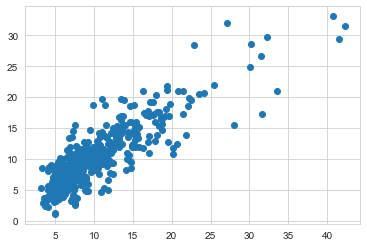

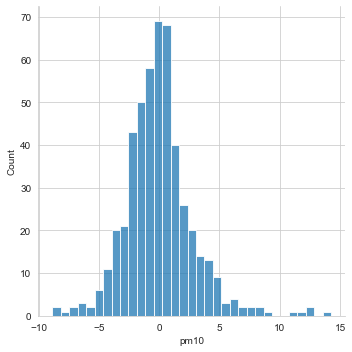

In [19]:
sns.displot(Y_test-y_test_pred)
y_for_gaus=Y_test-y_test_pred

In [20]:
import scipy
scipy.stats.shapiro(y_for_gaus)

ShapiroResult(statistic=0.9419125914573669, pvalue=5.004292878522942e-13)

In [21]:
print('MAE',metrics.mean_absolute_error(Y_test,y_test_pred))
print('MSE',metrics.mean_squared_error(Y_test,y_test_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,y_test_pred)))

MAE 2.0203365961362385
MSE 8.12447037766412
RMSE 2.8503456593304817


r-squered for train 0.8865833531803248
r-squered for test 0.8203056798419734
MAE 1.6248141593817276
MSE 5.655022173775085
RMSE 2.378029052340422


ShapiroResult(statistic=0.9104925394058228, pvalue=1.548811523106411e-16)

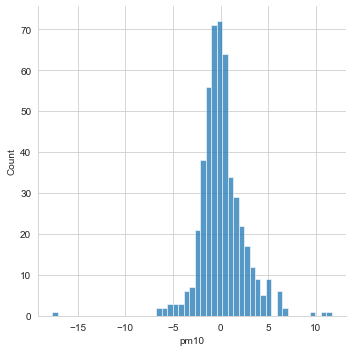

In [22]:
model=RandomForestRegressor(n_estimators=60,min_samples_leaf=5,max_depth=6,n_jobs=1)
model.fit(X_train,Y_train)
print("r-squered for train",model.score(X_train,Y_train))
print("r-squered for test",model.score(X_test,Y_test))
y_test_pred=model.predict(X_test)

sns.displot(Y_test-y_test_pred)
y_for_gaus=Y_test-y_test_pred
scipy.stats.shapiro(y_for_gaus)
print('MAE',metrics.mean_absolute_error(Y_test,y_test_pred))
print('MSE',metrics.mean_squared_error(Y_test,y_test_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,y_test_pred)))
scipy.stats.shapiro(y_for_gaus)